In [4]:
import cnn_workflow.utils
from finetuning import *

In [5]:
device = torch.device('cuda:1') if torch.cuda.is_available() else torch.device('cpu')
print(f'using device {device}')
num_classes = 10
classifier_idx = 0
vgg_str = 'vgg11'
note = 'all rotations'
print(f'note: {note}')

vgg_builder = VGG_builder(num_classes, vgg_str=vgg_str, classifier_idx=classifier_idx, note=note)

batch_size  = 32
num_workers = 5

test_data = datasets.ImageFolder('data/butterflies/test', transforms.ToTensor())

test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size)

test_mean, test_std = mean_std(test_loader)
print(f'test data mean per channel: {test_mean}')
print(f'test data std per channel: {test_std}')
test_data_normalized = datasets.ImageFolder('data/butterflies/test', transform=transforms.Compose([ transforms.ToTensor() , transforms.Normalize(test_mean, test_std)]))
test_loader_normalized = torch.utils.data.DataLoader(test_data_normalized, batch_size=batch_size, num_workers = num_workers, pin_memory=True)


using device cuda:1
note: all rotations
test data mean per channel: tensor([0.4548, 0.4413, 0.3095])
test data std per channel: tensor([0.2846, 0.2691, 0.2695])


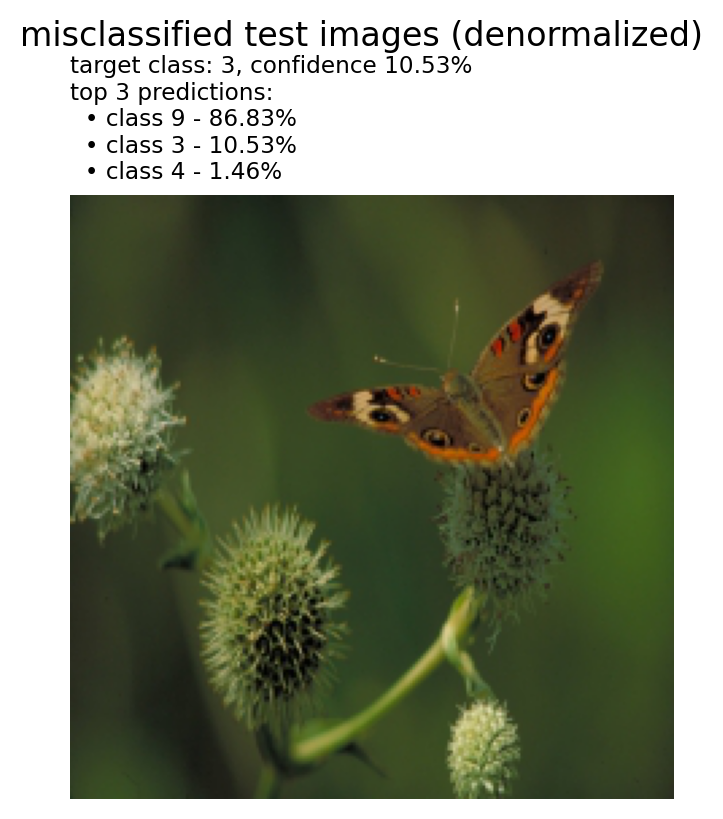

In [7]:
filter_list = [note, 'finetuning phase 2', 'lr=0.1']
epoch = 5
model = load_model_filter(device, vgg_builder, filter_list, epoch)
show_misclassified(model, device, test_loader_normalized, test_mean, test_std, save_path='test_results/'+' '.join(filter_list))